In [1]:
import os
import sys
sys.path.insert(0, '../')
import ccal
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

==================== Computational Cancer Analysis Library ====================
<16:45:28> Checking library dependencies ...
<16:45:28> Using the following libraries:
<16:45:28> 	scipy (v0.18.0)
<16:45:28> 	statsmodels (v0.6.1)
<16:45:28> 	scikit-learn (v0.17.1)
<16:45:28> 	seaborn (v0.7.1)
<16:45:28> 	rpy2 (v2.8.2)
<16:45:28> 	pandas (v0.18.1)
<16:45:28> 	matplotlib (v1.5.1)
<16:45:28> 	numpy (v1.11.1)
<16:45:28> Planted a random seed 20121020.


In [2]:
A = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/data/ccle_hema/ccle_hema_gene_filtered.gct')

In [3]:
nmf_results = ccal.analyze.nmf(A, range(3, 21))

<16:45:28> Performing NMF with k=3 ...
<16:45:28> Performing NMF with k=4 ...
<16:45:28> Performing NMF with k=5 ...
<16:45:28> Performing NMF with k=6 ...
<16:45:28> Performing NMF with k=7 ...
<16:45:28> Performing NMF with k=8 ...
<16:45:28> Performing NMF with k=9 ...
<16:45:28> Performing NMF with k=10 ...
<16:45:28> Performing NMF with k=11 ...
<16:45:28> Performing NMF with k=12 ...
<16:45:29> Performing NMF with k=13 ...
<16:45:29> Performing NMF with k=14 ...
<16:45:29> Performing NMF with k=15 ...
<16:45:29> Performing NMF with k=16 ...
<16:45:29> Performing NMF with k=17 ...
<16:45:29> Performing NMF with k=18 ...
<16:45:29> Performing NMF with k=19 ...
<16:45:29> Performing NMF with k=20 ...


In [4]:
nmf_results, clustering_scores = ccal.analyze.nmf_and_score(A, range(3, 21))

<16:45:29> Computing clustering score for k=3 using method cophenetic_correlation ...
<16:45:29> Running NMF (0/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (1/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (2/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (3/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (4/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (5/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (6/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (7/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (8/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (9/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (10/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (11/30) ...
<16:45:29> Performing NMF with k=3 ...
<16:45:29> Running NMF (12/30) ...
<

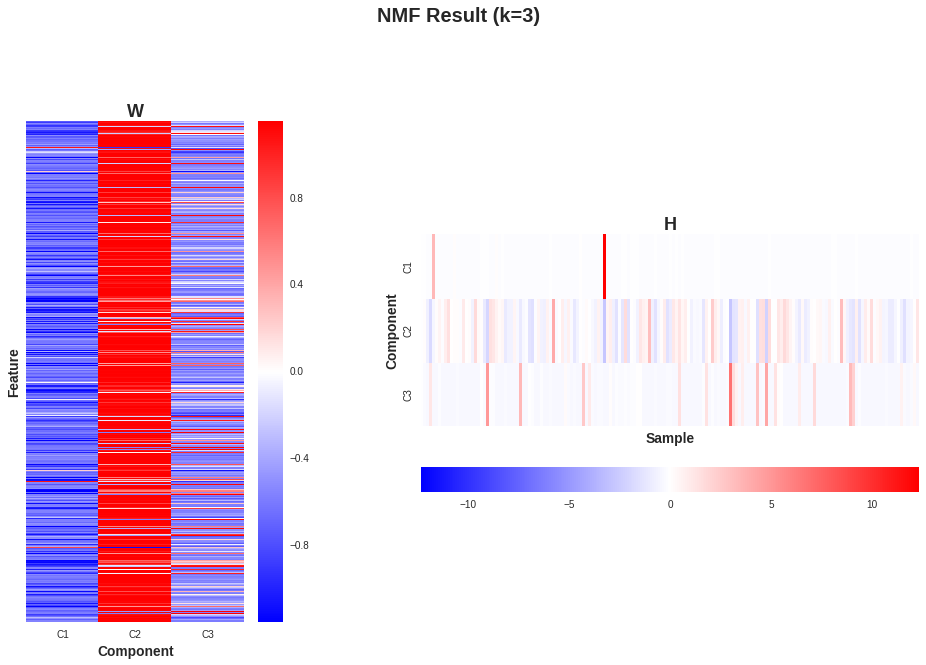

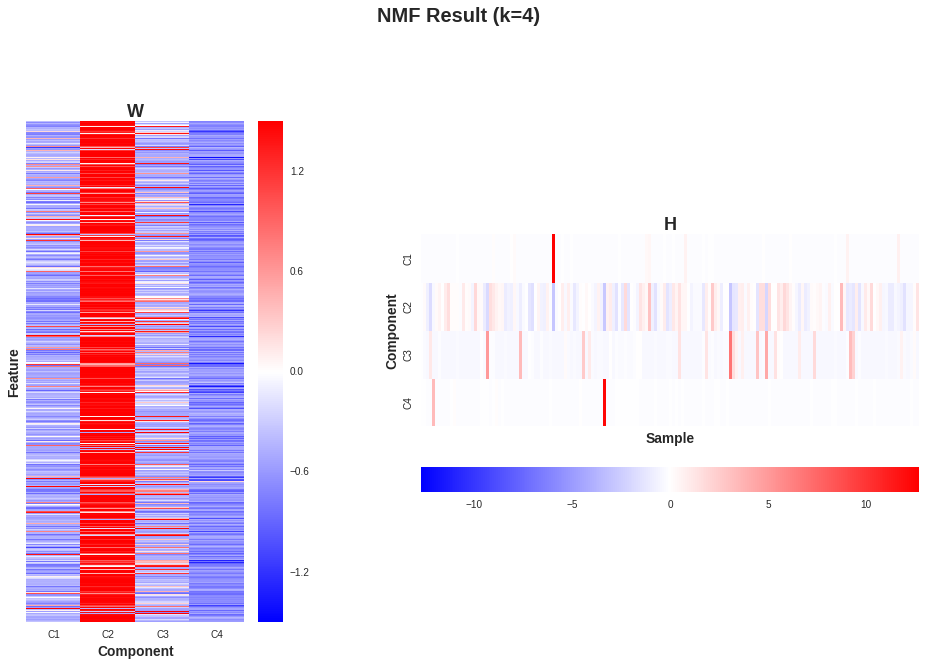

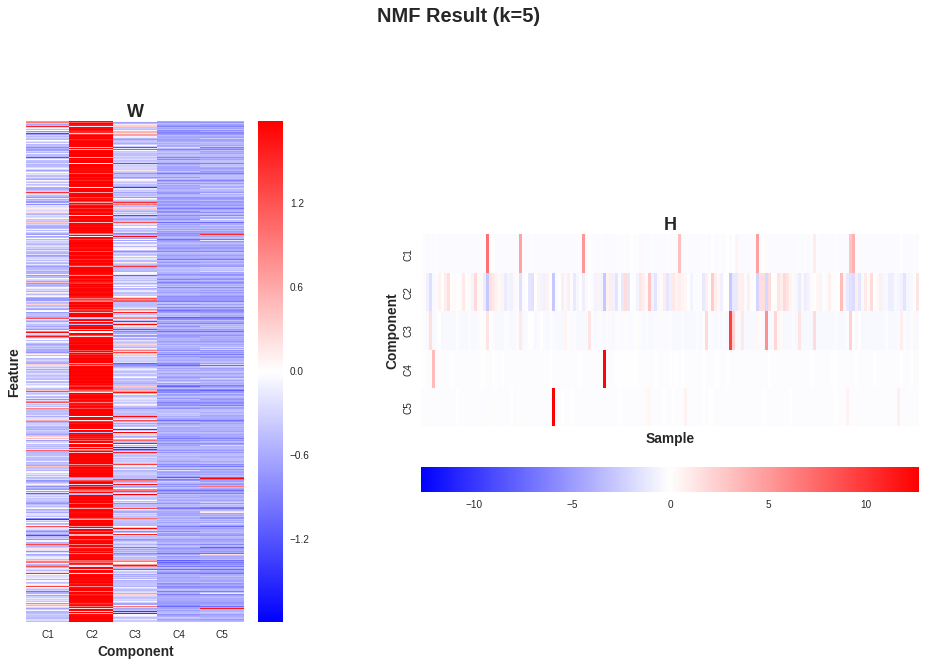

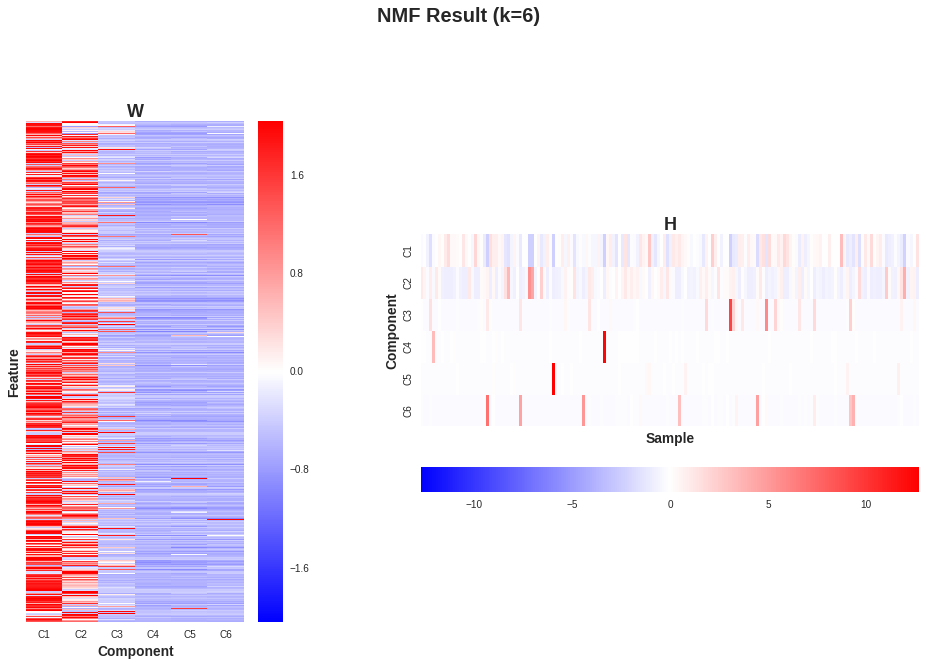

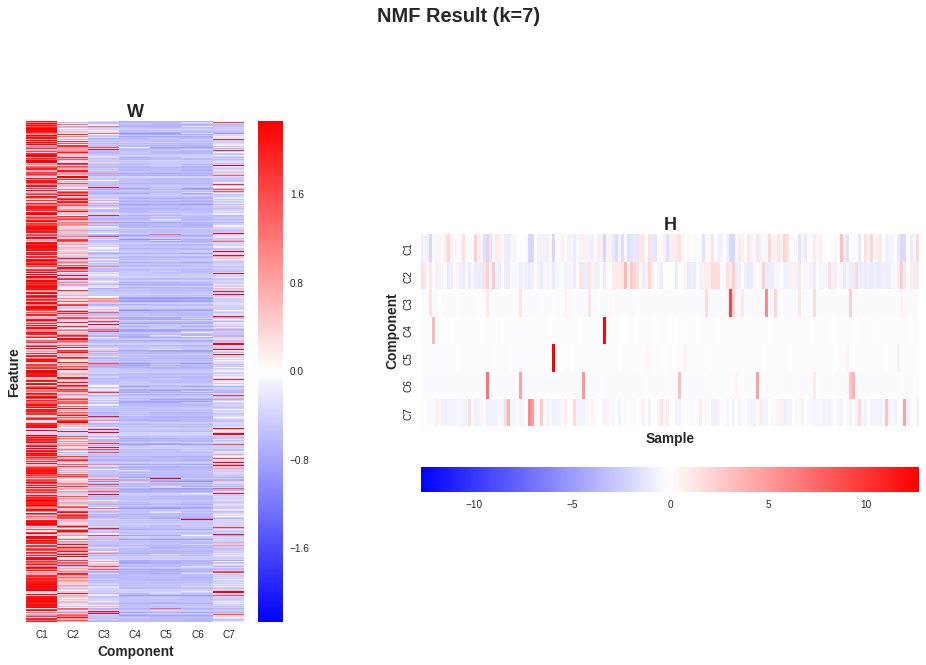

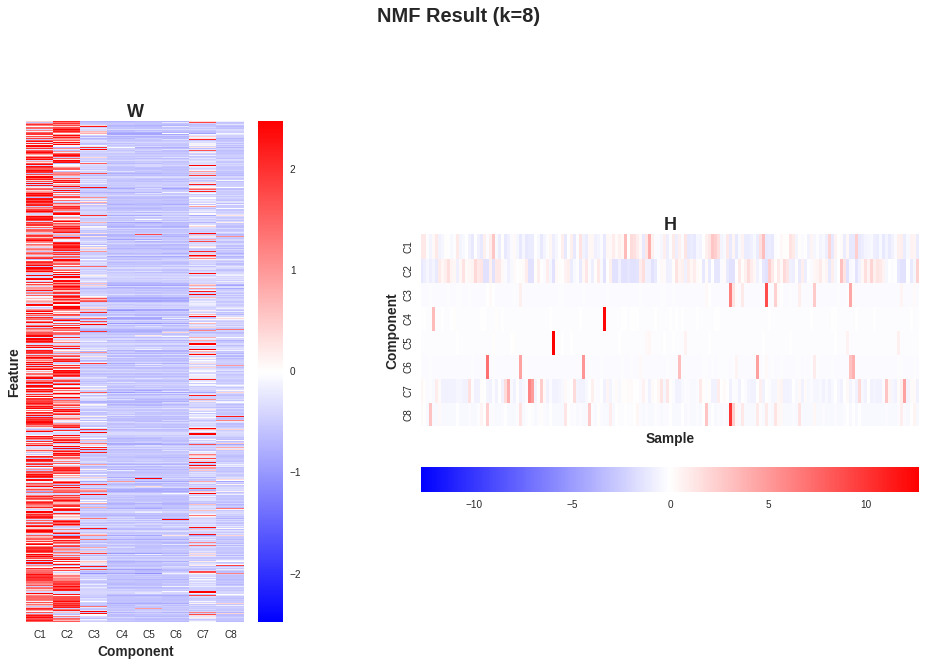

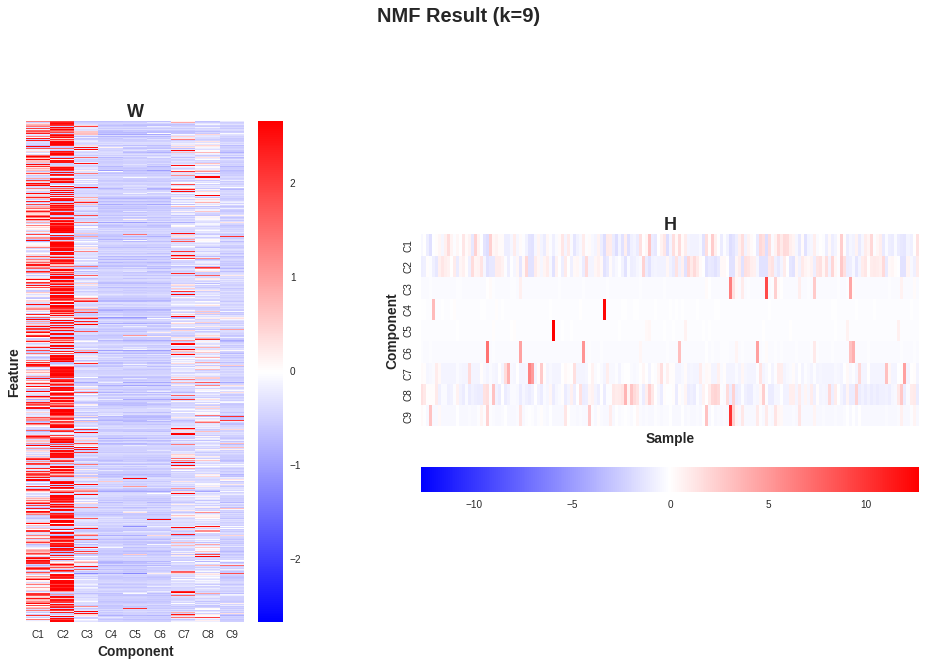

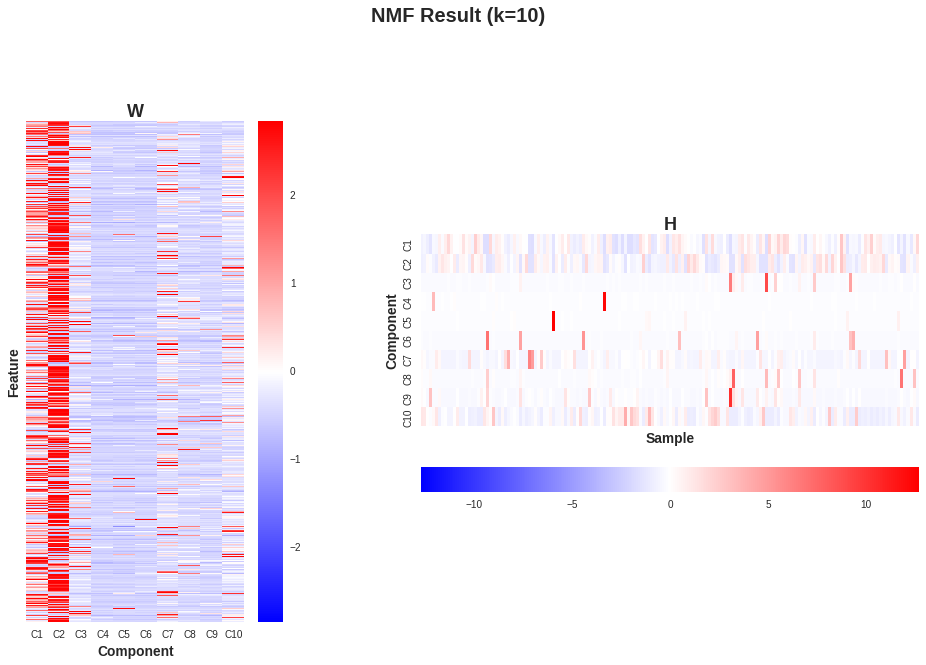

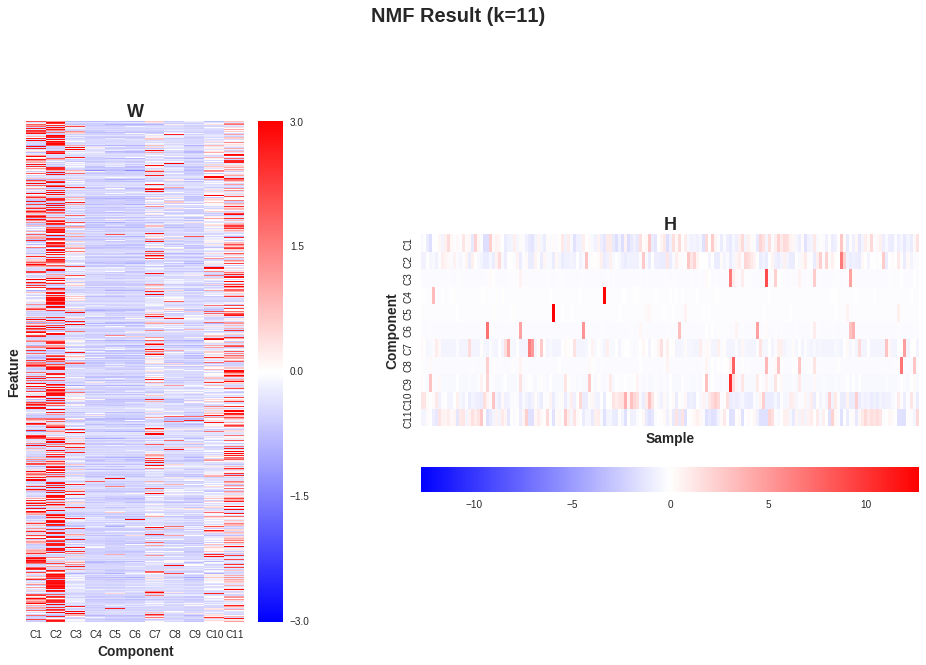

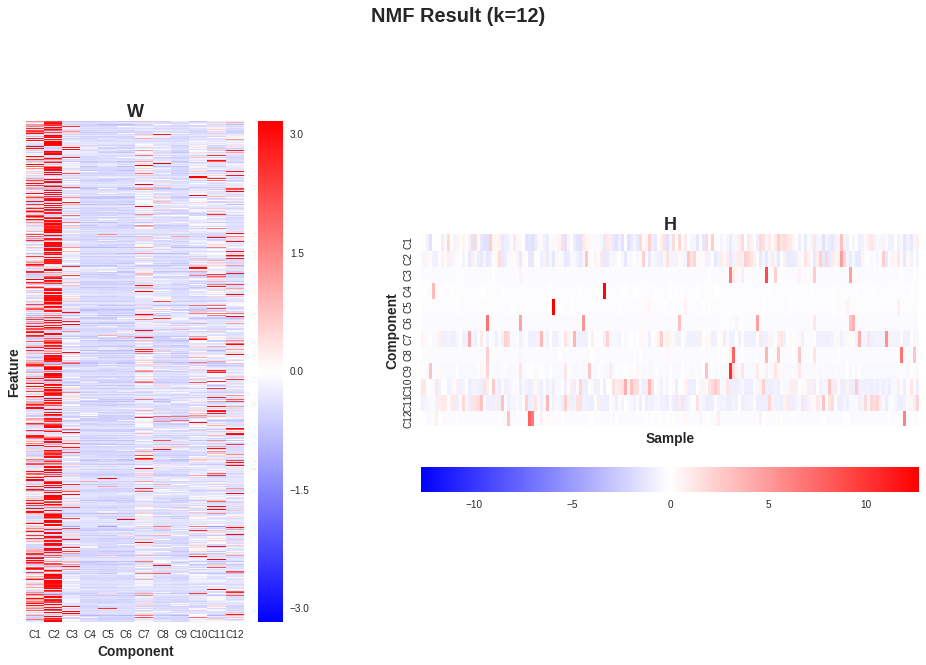

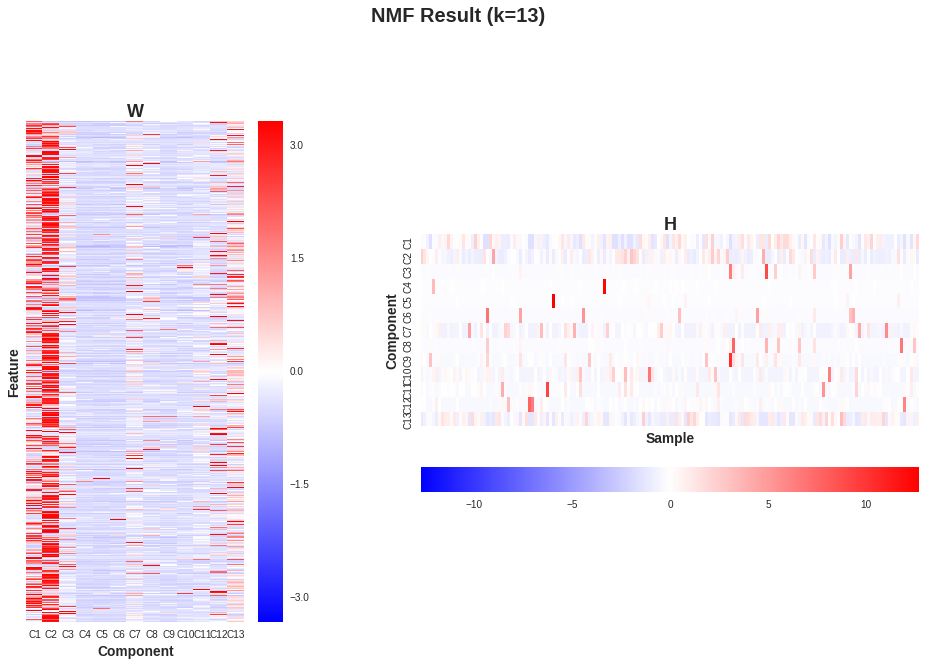

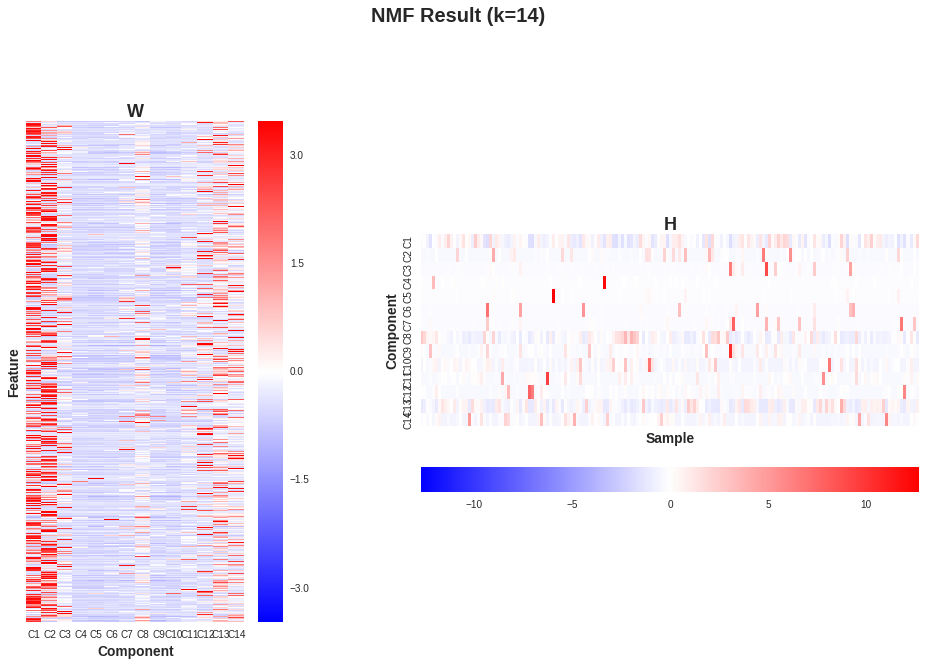

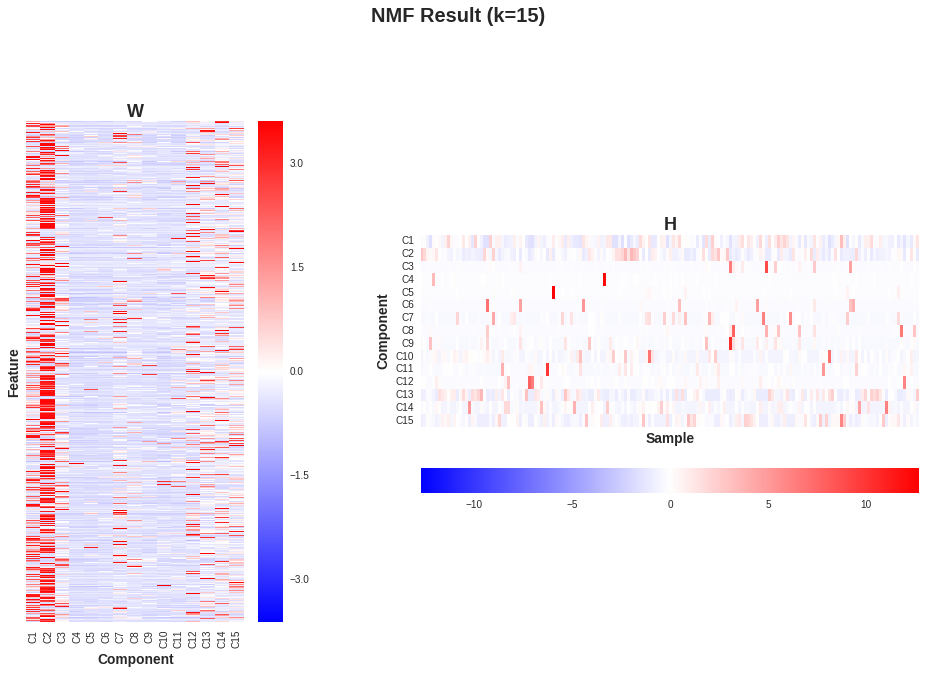

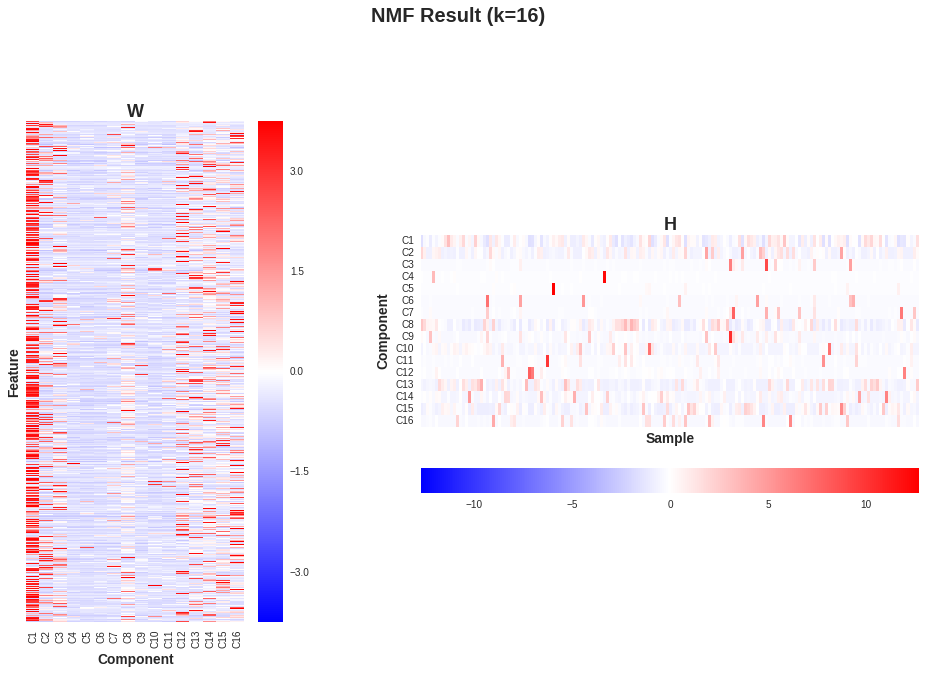

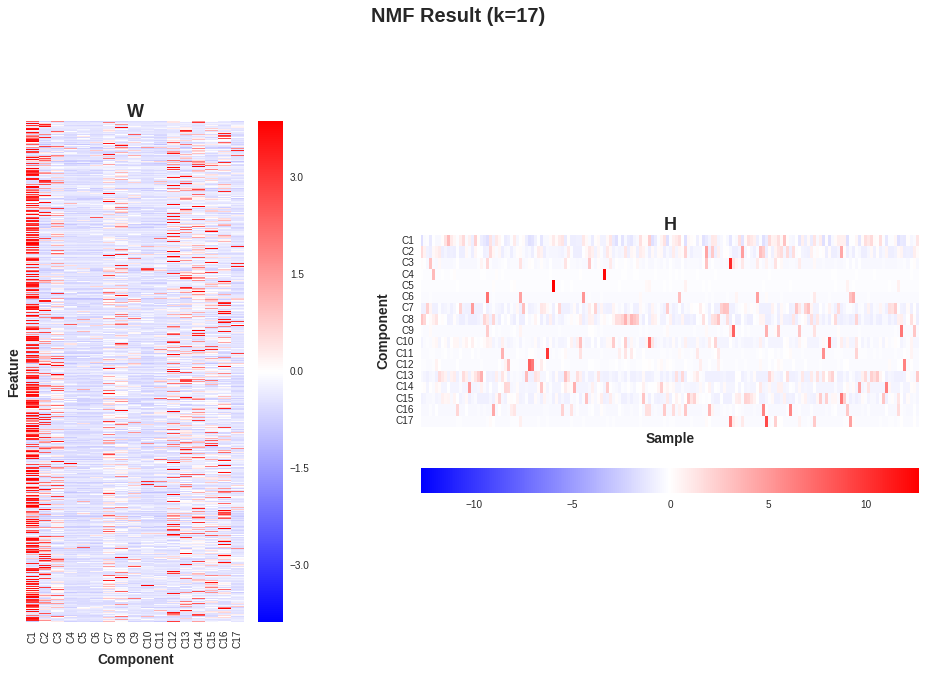

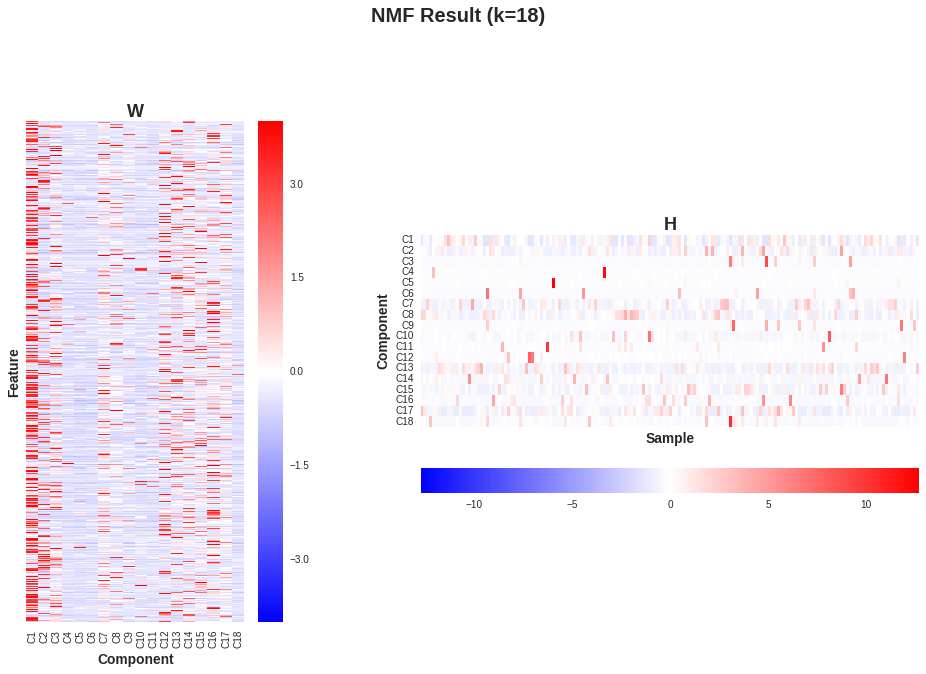

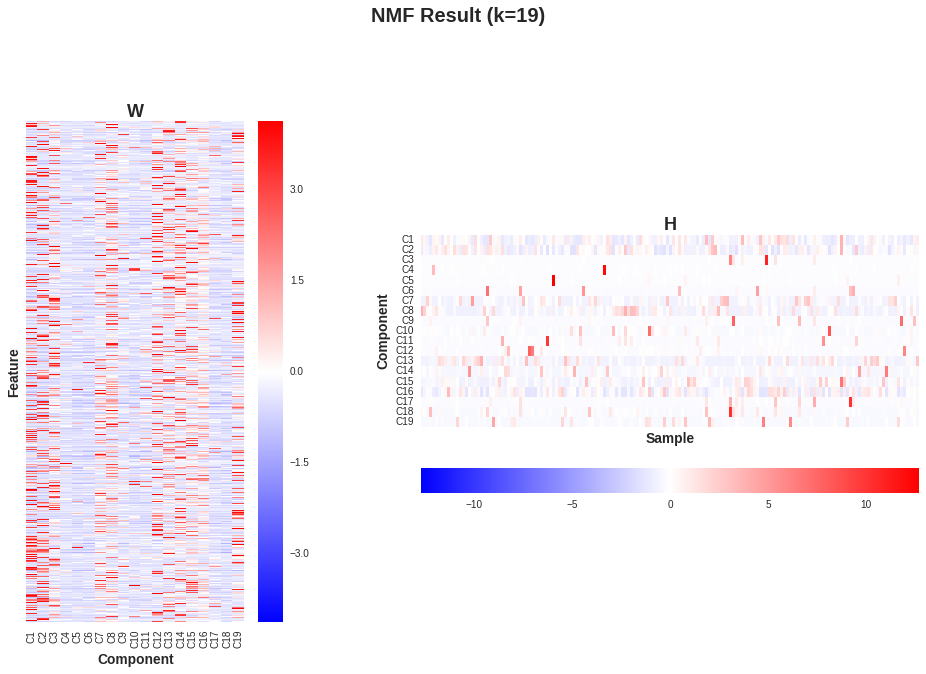

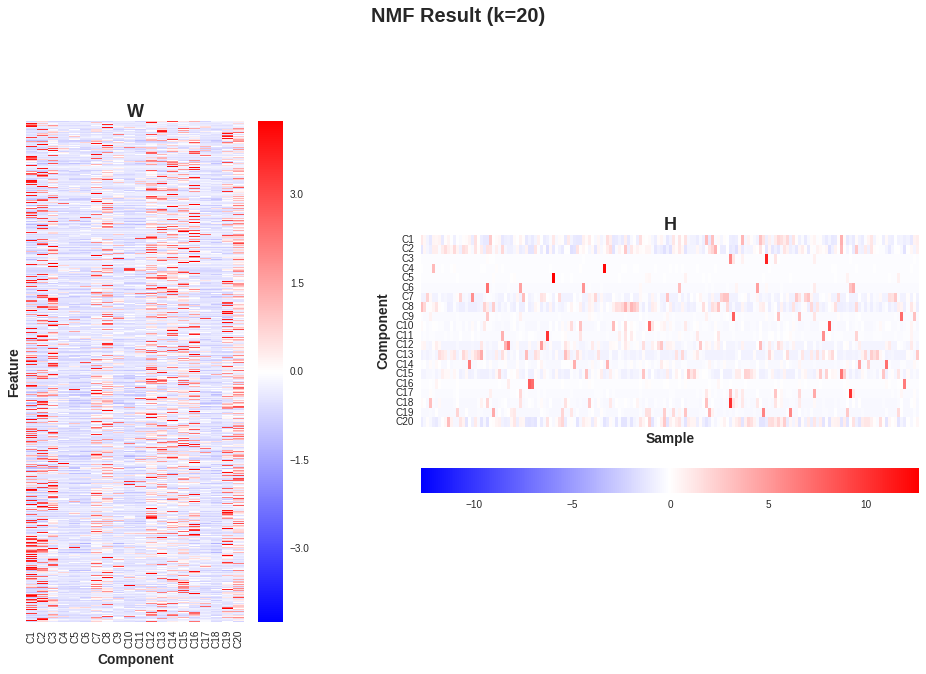

In [5]:
for k in nmf_results.keys():
    ccal.visualize.plot_nmf_result(nmf_results, k, output_filename='nmf_k={}.pdf'.format(k))

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn import heatmap, pointplot
from ccal.support import normalize_pandas_object, print_log
from ccal.visualize import CMAP_CONTINUOUS, FIGURE_SIZE, DPI

In [12]:
def plot_nmf_scores(scores, figure_size=FIGURE_SIZE, title='NMF Clustering Score vs. k', title_fontsize=20,
                    output_filename=None, dpi=DPI):
    figure = plt.figure(figsize=figure_size)
    
    if title:
        figure.suptitle(title, fontsize=title_fontsize, fontweight='bold')
        
    ax = pointplot(x=[k for k, v in scores.items()], y=[v for k, v in scores.items()])
    
    ax.set_xlabel('k', fontsize=title_fontsize * 0.81, fontweight='bold')
    ax.set_ylabel('Score', fontsize=title_fontsize * 0.81, fontweight='bold')

    if output_filename:
        plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

    plt.show()

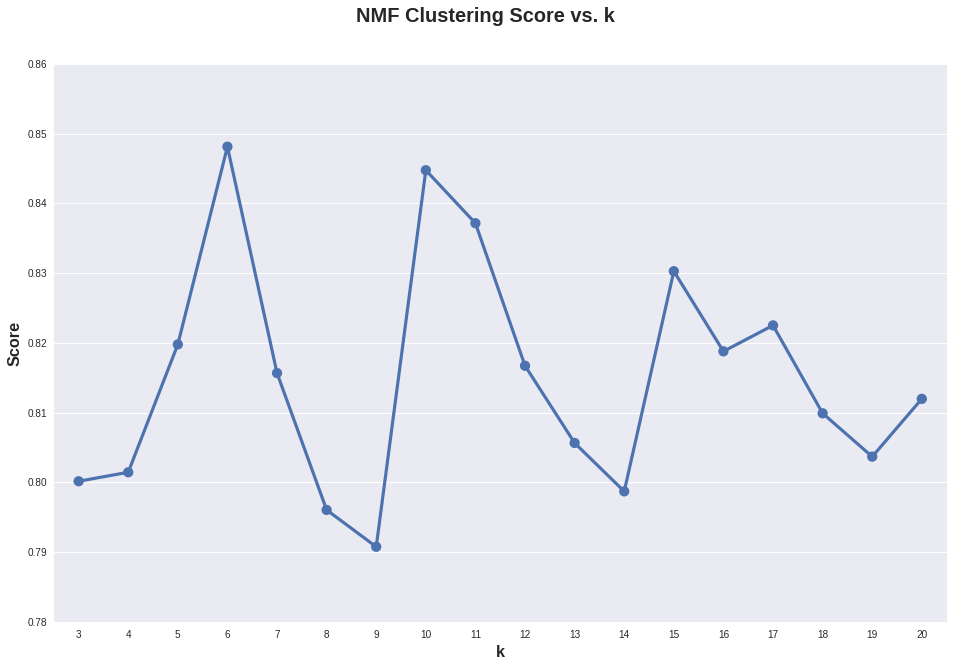

In [13]:
plot_nmf_scores(clustering_scores)